In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Loading Dataset -- CSV file 
dataset = pd.read_csv("UberDataset.csv")


In [7]:
#Displays First 10 Rows Of Dataset 
dataset.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [9]:
#Display Of Last 5 rows of Dataset 
dataset.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [11]:
#checking the shape of the dataset
#-- Returning a tuple ie(rows,coloumns) showing the dataset Dimensions
dataset.shape

(1156, 7)

In [13]:
# showing concise Summary of an Dataset 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [15]:
dataset.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [17]:
#Null Values Filled with defined Value for particular Column for Handling Missing Values
dataset['PURPOSE'].fillna("NOT DEFINED", inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_4140\4241164767.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE'].fillna("NOT DEFINED", inplace=True)


In [19]:
dataset[dataset['END_DATE'].isnull()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NOT DEFINED


In [21]:
#Filling Null Values with Some Particular Values
dataset["END_DATE"].fillna("Not Defined",inplace=True)
dataset["CATEGORY"].fillna("Not Defined",inplace=True)
dataset["START"].fillna("Not Defined",inplace=True)
dataset["STOP"].fillna("Not Defined",inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_4140\967247510.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["END_DATE"].fillna("Not Defined",inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_4140\967247510.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [23]:
#Converting Data Coloumn To Data-Time Format ie yyyy-mm-dd
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],
									errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],
									errors='coerce')
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT DEFINED
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [25]:
# Creating New Calculated Coloumn Extracting Date & Time from START_DATE
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

#Creating New Calculated Column Day-Night ie Categorizing Time into "Morning", "Afternoon", "Evening", "Night"
dataset['day-night'] = pd.cut(x=dataset['time'],
							bins = [0,12,16,19,24],
							labels = ['Morning','Afternoon','Evening','Night'])

dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT DEFINED,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [27]:
#Handling Null Values using fillna ffil/backfill method

# Fill missing values using forward fill (propagates the last valid observation forward)
dataset['START_DATE'].fillna(method='ffill', inplace=True) 

#Simarlary using forward fill for 'END_DATE' Column
dataset['END_DATE'].fillna(method='ffill', inplace=True)

#Simarlary using forward fill for 'date' Column
dataset['date'].fillna(method='ffill', inplace=True)

#Simarlary using forward fill for 'time' Column
dataset['time'].fillna(dataset['time'].mode()[0],inplace=True)


#similary using forward fill for 'day-night' coloumn

dataset['day-night'] = pd.cut(x=dataset['time'],
							bins = [0,12,16,19,24],
							labels = ['Morning','Afternoon','Evening','Night'])

dataset['day-night'].fillna(dataset['day-night'].mode()[0], inplace=True)




dataset


C:\Users\hp\AppData\Local\Temp\ipykernel_4140\1679478482.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['START_DATE'].fillna(method='ffill', inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_4140\1679478482.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset['START_DATE'].fillna(method='ffill', inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_4140\1679478482.py:7: FutureWarning: A value is trying to be set o

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT DEFINED,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1151,2016-12-12 20:48:00,2016-12-12 20:57:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,2016-12-12,18.0,Evening
1152,2016-12-12 20:48:00,2016-12-12 20:57:00,Business,Unknown Location,Unknown Location,16.2,Meeting,2016-12-12,18.0,Evening
1153,2016-12-12 20:48:00,2016-12-12 20:57:00,Business,Katunayake,Gampaha,6.4,Temporary Site,2016-12-12,18.0,Evening
1154,2016-12-12 20:48:00,2016-12-12 20:57:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,2016-12-12,18.0,Evening


In [29]:
#Counting the unique key values of Categorical/Text Coloumn

obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values

{'CATEGORY': 3, 'START': 178, 'STOP': 189, 'PURPOSE': 11, 'date': 114}

In [31]:
# Visulazation of Dataset by Creating Visualization Charts to give an insights

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600')])

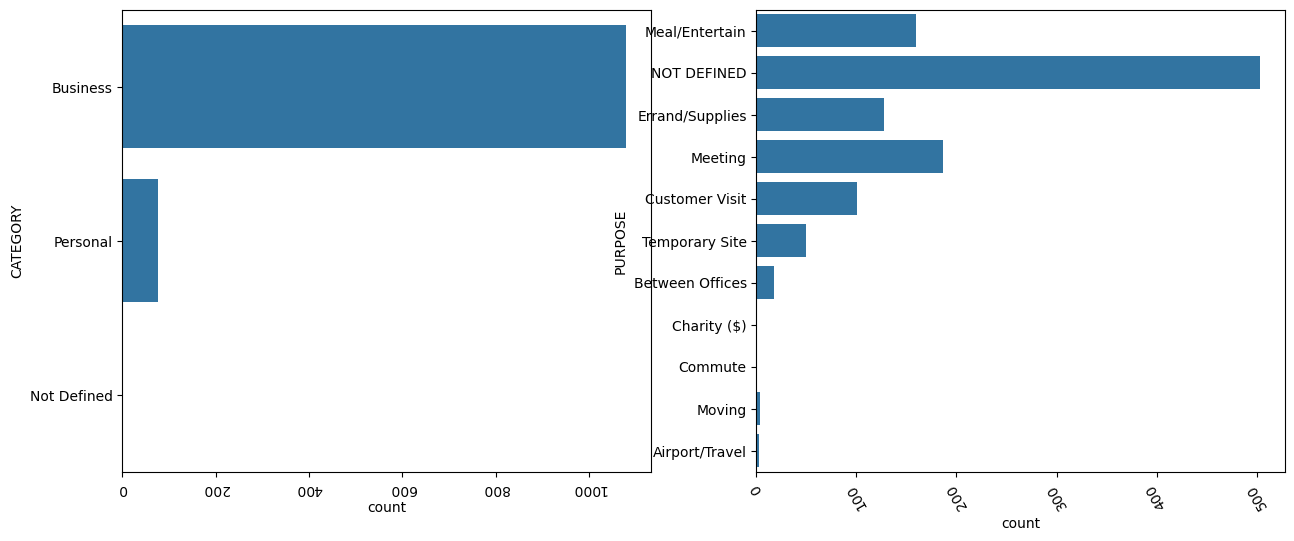

In [33]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(dataset['CATEGORY'])
plt.xticks(rotation=180)

plt.subplot(1,2,2)
sns.countplot(dataset['PURPOSE'])
plt.xticks(rotation=120)

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700'),
  Text(800.0, 0, '800'),
  Text(900.0, 0, '900')])

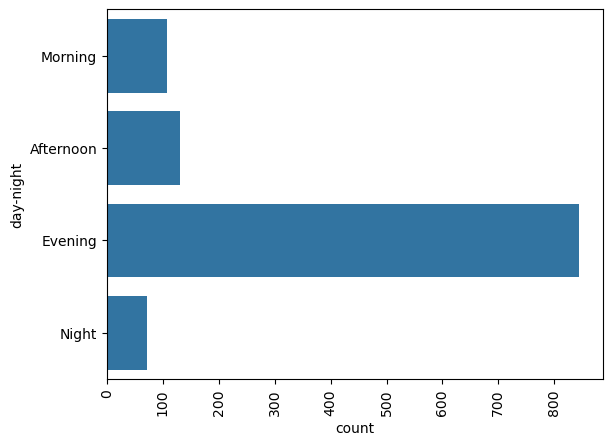

In [35]:
sns.countplot(dataset['day-night'])
plt.xticks(rotation=90)

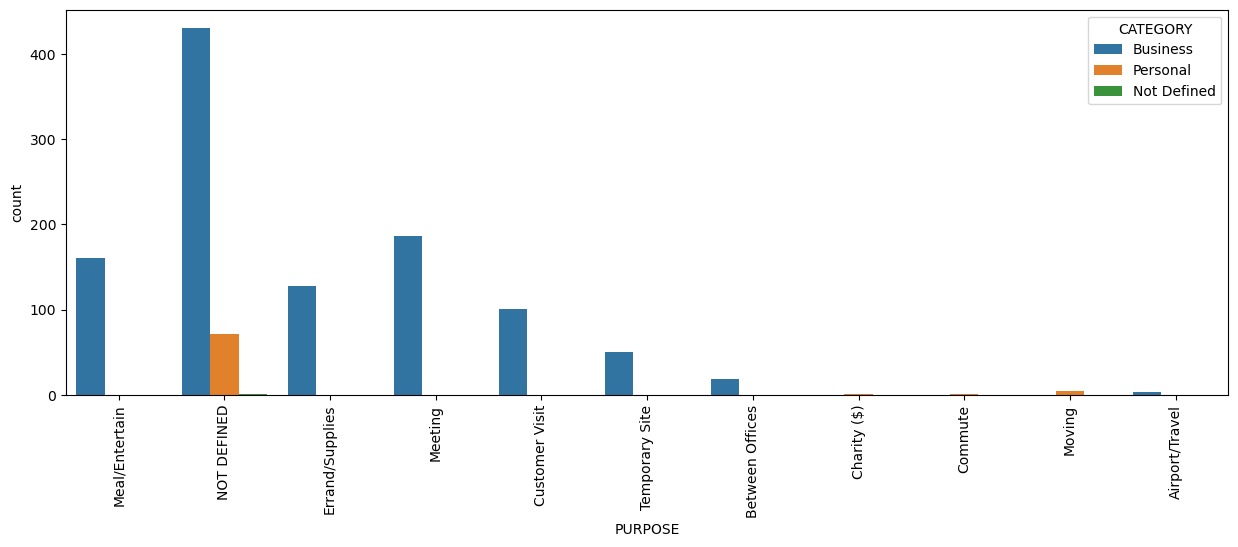

In [37]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

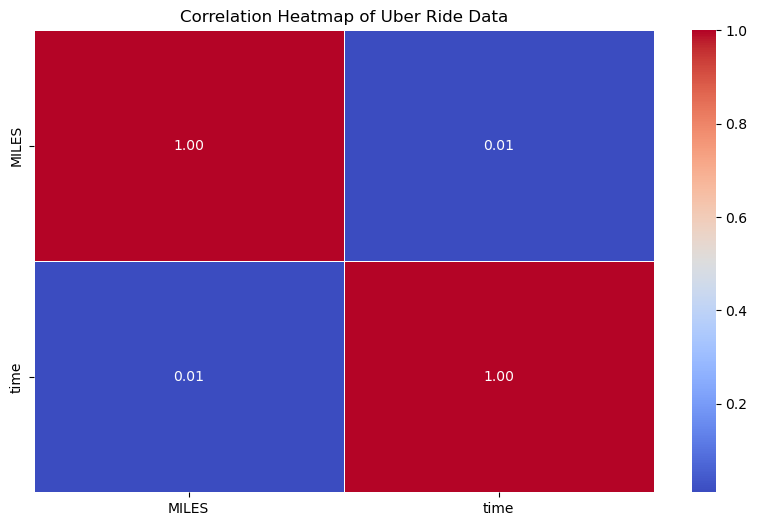

In [40]:
#corelation heatmap
corr_matrix = dataset.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 6))  # Set figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Uber Ride Data")
plt.show()


In [42]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
	0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

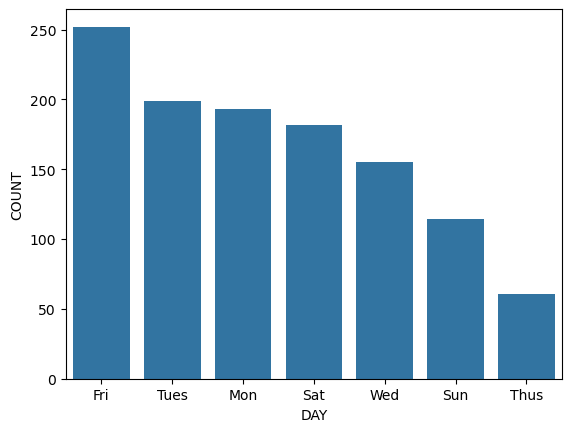

In [44]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')